## kraken annotation 

what is kraken

This is done on Carbonate, a supercomputer, because the data set was too large to transfer to a Jetstream VM. This script will align reads against the kraken database to find the taxa.

In [ ]:
#on Carbonate load kraken
module load kraken

In [ ]:
#aligns reads against DB for each metagenome sample
#on Carbonate in interactive computer node 
kraken2 --db $KRAKEN_DB --use-names --report-zero-counts --paired "$f"_1.fq "$f"_2.fq --report "$f"_kraken_report 

explain output from kraken. documentation, file output, 

In [ ]:
#put all reports into one directory
mkdir kraken_report
mv *_kraken_report FILEPATH/kraken_report/

In [ ]:
#combine each report into one table using kraken
#clone girhub kraken2-output
git clone https://github.com/npbhavya/Kraken2-output-manipulation.git

In [ ]:
#load python 3 
module unload python/2
module load python/3

In [ ]:
#get taxa information into a table (in git hub clone)
python kraken-multiple-taxa.py -d kraken_report/ -r F -c 1 -o kraken-report-final

In [ ]:
#generate .csv for R 
sed -e "s/\[//g;s/\]//g;s/'//g;s|\t|,|g" kraken-report-final >kraken_report_final_table.csv

In [ ]:
output type and add jetstream section 

In [ ]:
#on Jetstream to transfer table to VM 
sudo scp hleffler@carbonate.uits.iu.edu:/N/dc2/scratch/hleffler/Kraken2-output-manipulation/kraken_report_final_taxa_table.csv .

In [ ]:
#download Rscripts
git clone https://github.com/npbhavya/Kraken2-output-manipulation.git

In [ ]:
output o

# Rarefraction curve 

This is where I will say some things about the refraction curve and what it is for.
input type

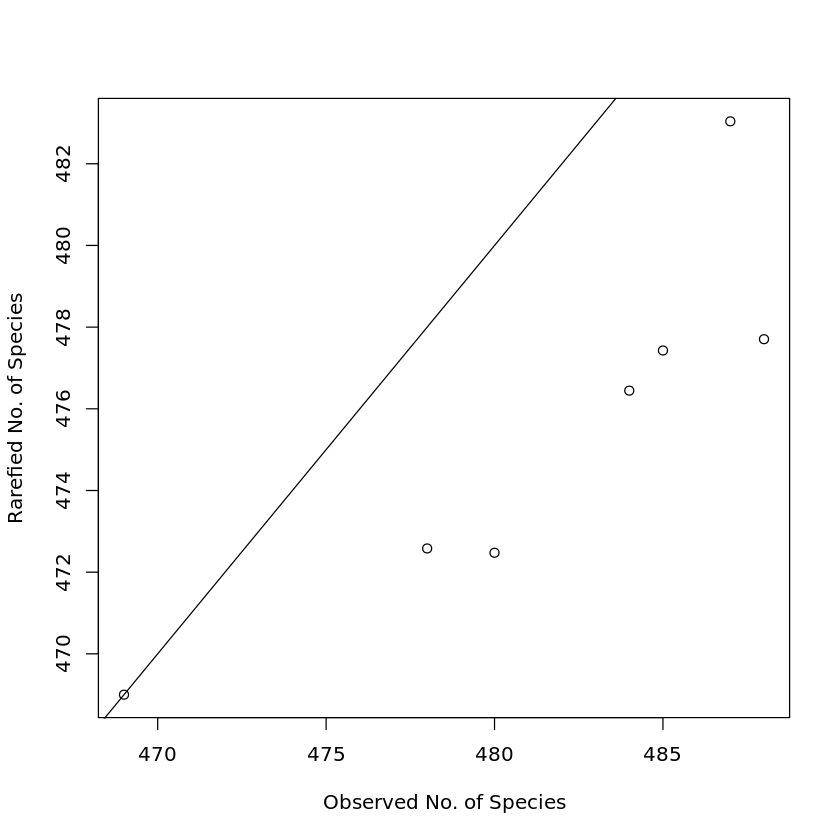

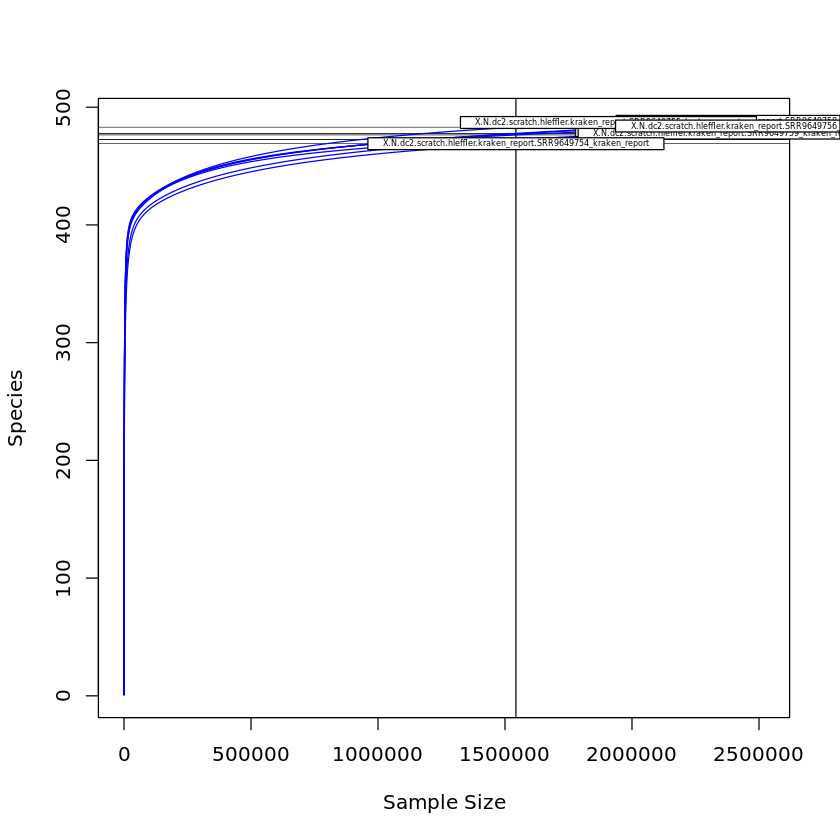

In [17]:
#install.packages("vegan");
library(vegan);

#importing the file and parsing the file correctly
# Replace the kraken.csv name to the actual filename.
Data=read.table("kraken_report_final_taxa_table.csv", sep=",", row.names = 1, header=TRUE);
Data_t=as.data.frame(t(Data));
#print(Data_t);


#count the number of species
S = specnumber(Data_t);
raremax = min(rowSums(Data_t));
#print(S);
#print(raremax);

#Rarefaction of the samples
Srare = rarefy(Data_t, raremax);
#print(Srare);

#plotting the rarefaction curves
plot(S, Srare, xlab = "Observed No. of Species", ylab = "Rarefied No. of Species")
abline(0, 1)
#pdf("Rarefaction_curve.pdf")
rarecurve(Data_t, step =20, sample = raremax, col = "blue", cex = 0.4, )
#dev.off()

In [ ]:
explain rarefaction plot and meaning in terms of data 

# PCA plots

A principal component analysis 

In [12]:
#this is the installations and explain pca plots in markdown
## PCA
#dependencies for devtools package
 #before installing these packages must have these commands ran in terminal file path: ~/R/USERNAME/R/x86_64-pc-linux-gnu-library/3.4
    #sudo apt-get install -y libcurl4-openssl-dev
    #sudo apt-get install libssl-dev
    #sudo apt-get install libxml2
    #sudo apt-get install libxml2-dev
#install.packages("curl", lib="/home/hleffler/R/x86_64-pc-linux-gnu-library/3.4");
#install.packages("gh");
#install.packages("xml2");
#install.packages("usethis");
#install.packages("covr");
#install.packages("roxygen2");
#install.packages("rversions");

#update.packages("devtools")
#install.packages("devtools");
library(devtools);
#install_github("vqv/ggbiplot") #to install the ggbiplot
library(ggbiplot);


X.N.dc2.scratch.hleffler.kraken_report.SRR9649760_kraken_report 
                                                       477.4279 
X.N.dc2.scratch.hleffler.kraken_report.SRR9649757_kraken_report 
                                                       472.4748 
X.N.dc2.scratch.hleffler.kraken_report.SRR9649758_kraken_report 
                                                       477.7043 
X.N.dc2.scratch.hleffler.kraken_report.SRR9649759_kraken_report 
                                                       472.5808 
X.N.dc2.scratch.hleffler.kraken_report.SRR9649755_kraken_report 
                                                       483.0394 
X.N.dc2.scratch.hleffler.kraken_report.SRR9649754_kraken_report 
                                                       469.0000 
X.N.dc2.scratch.hleffler.kraken_report.SRR9649756_kraken_report 
                                                       476.4447 
attr(,"Subsample")
[1] 1542992


ERROR: Error in apply(Srare, 2, var, na.rm = TRUE): dim(X) must have a positive length


notes -- script to work on 

In [ ]:
#step to remove the variables without a lot of variance
#array returns list of values, var is variance of x na.rm remove missing values, not equal to 0
Srare_clean=Srare[,apply(Srare, 2,var, na.rm=TRUE)!=0]


#print(Srare)
#print(Srare_clean)

data.pca=prcomp(Srare_clean, center = TRUE)
summary(data.pca)
#View(data.pca)

ggbiplot(data.pca)
location=c("seep2","ref","seep1","seep2","seep1","ref","seep1")
ggbiplot(data.pca, varname.size = 0, ellipse = TRUE, groups = location, circle = TRUE)
